In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os

In [45]:
import matplotlib.pyplot as plt

In [24]:
DATA_DIR = "//Natalie/Dokumente/TempMasterarbeit/Raw Data"

In [25]:
df = pd.read_csv(os.path.join(DATA_DIR, "0 Warenausgang.Time.csv"))

In [26]:
df.head()

,MARKT,ARTIKEL,BELEGTYP,MENGE,DATUM
0,5,165063,UMSATZ_AKTION,3.0,02.01.16
1,5,16644,UMSATZ_SCANNING,1.0,02.01.16
2,5,20238,UMSATZ_SCANNING,1.0,02.01.16
3,5,43539,UMSATZ_SCANNING,2.0,02.01.16
4,5,110761,UMSATZ_SCANNING,1.0,02.01.16


In [27]:
df.BELEGTYP.unique()

array(['UMSATZ_AKTION', 'UMSATZ_SCANNING', 'ABSCHRIFT', 'RABATT',
       'AUSLIEFERUNG', 'AUSLIEFERUNG RBTF'], dtype=object)

In [29]:
df["DATUM"] = pd.to_datetime(df["DATUM"], format='%d.%m.%y')

In [30]:
df.describe()

,MARKT,ARTIKEL,MENGE
count,2913049.0,2.913049e+06,2.913049e+06
mean,5.0,1.045891e+05,2.377585e+00
std,0.0,1.068698e+05,9.424243e+00
min,5.0,1.280000e+02,-2.900000e+01
25%,5.0,2.433600e+04,1.000000e+00
50%,5.0,5.160900e+04,1.000000e+00
75%,5.0,1.643340e+05,2.000000e+00
max,5.0,4.224100e+05,1.200000e+03


In [31]:
warengruppen = pd.read_csv(os.path.join(DATA_DIR, "0 Warengruppenstamm.csv"))

In [32]:
warengruppen.head()

,WARENGRUPPE,WARENGRUPPENNUMMER,WARENGRUPPE_BEZ,ABTEILUNG,ABTEILUNGSNUMMER,ABTEILUNG_BEZ
0,87,51,PRALINEN-SCHOKOARTIK,1,1,FOOD
1,86,91,TANKSTELLE,1,1,FOOD
2,85,40,ZUCKER,1,1,FOOD
3,84,37,"REIS, TEIGWAREN",1,1,FOOD
4,83,36,MÜSLI,1,1,FOOD


In [33]:
warengruppen.ABTEILUNG_BEZ.unique()

array(['FOOD', 'FISCHABTEILUNG', 'GETRÄNKEABTEILUNG', 'TABAKWAREN',
       'METZGEREI', 'ZEITSCHRIFTEN/BÜCHER', 'MWSTfreie Artikel',
       'BACKSHOP', 'KÄSEABTEILUNG', 'DROGERIE', 'OBST UND GEMÜSE',
       'NON FOOD', 'MOLKEREIPRODUKTE', 'LEERGUT', 'TIEFKÜHLKOST',
       'SB-WURST'], dtype=object)

In [34]:
print(df.DATUM.max(), df.DATUM.min())

2019-06-29 00:00:00 2016-01-02 00:00:00


In [35]:
df[["BELEGTYP", "MENGE", "DATUM"]].groupby("BELEGTYP").sum()

,MENGE
BELEGTYP,
ABSCHRIFT,81351.512
AUSLIEFERUNG,-881.684
AUSLIEFERUNG RBTF,881.684
RABATT,0.000
UMSATZ_AKTION,577022.828
UMSATZ_SCANNING,6267648.112


In [36]:
df = df[df.BELEGTYP.isin(["ABSCHRIFT", "UMSATZ_AKTION", "UMSATZ_SCANNING"])]

In [40]:
df["JAHR"] = df.DATUM.dt.year

In [42]:
df[["BELEGTYP", "MENGE", "JAHR"]].groupby(["BELEGTYP", "JAHR"]).sum()

MENGE
BELEGTYP        JAHR             
ABSCHRIFT       2016     1843.760
                2017    18713.080
                2018    39839.462
                2019    20955.210
UMSATZ_AKTION   2016   175528.516
                2017   176993.507
                2018   151579.191
                2019    72921.614
UMSATZ_SCANNING 2016  1605053.907
                2017  1712586.394
                2018  1912611.486
                2019  1037396.325

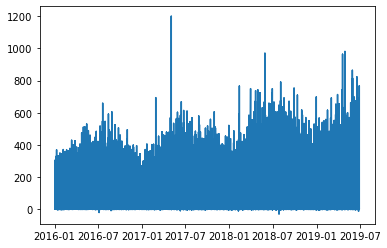

In [47]:
plt.plot(df["DATUM"], df["MENGE"])

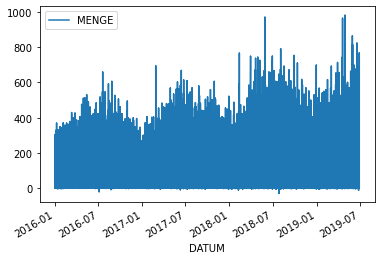

In [52]:
df[df.BELEGTYP == "UMSATZ_SCANNING"].plot(x="DATUM", y="MENGE")

In [54]:
df = df.groupby(["DATUM", "BELEGTYP", "ARTIKEL"]).sum()

In [57]:
df.drop(columns=['JAHR'], inplace=True)

In [58]:
table = pd.pivot_table(df, values='MENGE', index=['DATUM'],

                    columns=['BELEGTYP'], aggfunc=np.sum)

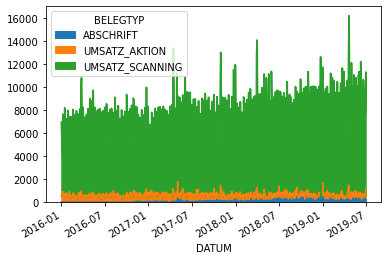

In [60]:
table.plot.area()

In [62]:
df_wg = df

In [64]:
df_wg.reset_index(inplace=True)

In [65]:
df_wg.drop(columns=['MARKT'], inplace=True)

In [67]:
table_wg = pd.pivot_table(df, values='MENGE', index=['DATUM', 'ARTIKEL'],

                    columns=['BELEGTYP'], aggfunc=np.sum)

In [72]:
table_wg.fillna(0, inplace=True)

In [73]:
table_wg['MENGE'] = table_wg['UMSATZ_SCANNING'] + table_wg['UMSATZ_AKTION'] - table_wg['ABSCHRIFT']

In [75]:
table_wg.drop(columns=['UMSATZ_SCANNING', 'UMSATZ_AKTION', 'ABSCHRIFT'], inplace=True)

In [77]:
stamm = pd.read_csv(os.path.join(DATA_DIR, "0 ArtikelstammV4.csv"))

In [89]:
art_wg_map = { art: wg for art, wg in zip(stamm['ARTIKEL'].to_numpy(), stamm['WARENGRUPPE'].to_numpy())}

In [90]:
stamm.head(3)

,ARTIKEL,WARENGRUPPE,DETAILWARENGRUPPE,BEZEICHNUNG,KNZ_EIGENMARKE,KNZ_EINHEIT,KNZ_VERKAUFSEINH,ANZ_TAGE_MHD,KNZ_GUT1GUENSTIG,KNZ_OSE,KNZ_OSE_TEXT,KNZ_SAISONARTIKEL,KNZ_KERNSORTIMENT,KNZ_BIOETIKETT,KNZ_GLUTENFREI,KNZ_LAKTOSEFREI,KNZ_MARKE_FK,KNZ_REGION
0,1,49,4268.0,"BAUERNKOCHSCHINKEN CA.4,1KG",0,2,KG,14,0,0.0,ST,0.0,0,0,1,0,NaN,NaN
1,2,49,4268.0,WACHOLDER.PUTENBRUST GEG.+GER.,0,2,KG,14,0,0.0,ST,0.0,0,0,1,1,NaN,NaN
2,4,49,4266.0,"SCHWARZRAUCHSCHINKEN CA.1,4KG",0,2,KG,16,0,0.0,ST,0.0,0,0,1,0,NaN,NaN


In [94]:
table_wg.reset_index(inplace=True)

In [95]:
table_wg["WGR"] = table_wg["ARTIKEL"].map(art_wg_map)

In [96]:
wg_abt_map = { wg: abt for wg, abt in zip(warengruppen['WARENGRUPPE'].to_numpy(), warengruppen['ABTEILUNG_BEZ'].to_numpy())}

In [98]:
table_wg["ABT"] = table_wg["WGR"].map(wg_abt_map)

BELEGTYP,DATUM,ARTIKEL,MENGE,WGR,ABT
0,2016-01-02,2912,3.0,81,SB-WURST
1,2016-01-02,2913,2.0,81,SB-WURST
2,2016-01-02,2919,1.0,81,SB-WURST
3,2016-01-02,2921,1.0,81,SB-WURST
4,2016-01-02,2960,3.0,81,SB-WURST
...,...,...,...,...,...
2865638,2019-06-29,421018,2.0,80,GETRÄNKEABTEILUNG
2865639,2019-06-29,421047,1.0,6,NON FOOD
2865640,2019-06-29,421270,11.0,33,OBST UND GEMÜSE
2865641,2019-06-29,421301,7.0,33,OBST UND GEMÜSE


In [100]:
table_abt = pd.pivot_table(table_wg, values='MENGE', index=['DATUM'],

                    columns=['ABT'], aggfunc=np.sum)

In [102]:
table_abt

ABT,BACKSHOP,DROGERIE,FISCHABTEILUNG,FOOD,GETRÄNKEABTEILUNG,KÄSEABTEILUNG,LEERGUT,METZGEREI,MOLKEREIPRODUKTE,MWSTfreie Artikel,NON FOOD,OBST UND GEMÜSE,SB-WURST,TABAKWAREN,TIEFKÜHLKOST,ZEITSCHRIFTEN/BÜCHER
DATUM,,,,,,,,,,,,,,,,
2016-01-02,NaN,919.0,NaN,1784.0,836.0,0.612,638.0,NaN,1154.487,7.0,86.0,543.436,196.604,258.0,345.0,217.18
2016-01-04,NaN,832.0,NaN,1376.0,556.0,0.302,447.0,NaN,746.000,3.0,94.0,388.959,129.373,183.0,196.0,139.08
2016-01-05,NaN,690.0,NaN,1164.0,503.0,0.168,366.0,NaN,670.000,NaN,53.0,381.542,133.040,149.0,210.0,122.74
2016-01-06,NaN,638.0,NaN,1114.0,567.0,0.505,424.0,NaN,559.000,4.0,57.0,316.328,116.143,153.0,170.0,162.47
2016-01-07,NaN,669.0,NaN,1200.0,507.0,0.146,413.0,NaN,641.000,2.0,47.0,345.179,132.293,147.0,176.0,129.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-25,NaN,714.0,NaN,1453.0,1381.0,NaN,1126.0,NaN,908.000,6.0,67.0,651.359,195.000,226.0,319.0,120.58
2019-06-26,NaN,706.0,NaN,1431.0,1259.0,0.159,1101.0,NaN,815.000,2.0,95.0,511.886,193.951,207.0,354.0,157.69
2019-06-27,NaN,783.0,NaN,1513.0,1402.0,NaN,1207.0,NaN,982.000,3.0,110.0,599.508,218.000,227.0,366.0,172.17


In [103]:
table_abt.describe()

ABT,BACKSHOP,DROGERIE,FISCHABTEILUNG,FOOD,GETRÄNKEABTEILUNG,KÄSEABTEILUNG,LEERGUT,METZGEREI,MOLKEREIPRODUKTE,MWSTfreie Artikel,NON FOOD,OBST UND GEMÜSE,SB-WURST,TABAKWAREN,TIEFKÜHLKOST,ZEITSCHRIFTEN/BÜCHER
count,1.0,1052.000000,2.000000,1053.000000,1053.000000,942.000000,1052.000000,26.000000,1053.000000,999.000000,1052.000000,1053.000000,1053.000000,1052.000000,1052.000000,1052.000000
mean,1.0,791.307985,0.293000,1707.137702,897.974359,0.830691,718.137833,0.621500,915.884415,4.082082,101.592205,468.102803,187.090835,201.938213,255.481618,175.756008
std,NaN,189.275991,0.405879,507.318563,265.563610,1.007709,213.416852,1.037852,276.028405,2.417221,40.626165,186.779511,69.212224,44.511419,72.341108,62.599164
min,1.0,390.000000,0.006000,-20.000000,-10.000000,-11.328000,162.000000,-1.000000,-228.000000,1.000000,41.000000,-882.271000,-36.000000,119.000000,119.000000,56.810000
25%,1.0,653.750000,0.149500,1343.000000,698.000000,0.324000,555.000000,0.204500,718.000000,2.000000,74.750000,339.165000,139.975000,169.000000,203.750000,126.205000
50%,1.0,744.000000,0.293000,1543.000000,834.000000,0.649500,670.000000,0.326000,818.000000,4.000000,93.000000,419.819000,168.283000,192.500000,238.500000,163.050000
75%,1.0,904.000000,0.436500,1972.000000,1053.000000,1.177000,840.250000,0.654500,1090.000000,5.000000,118.000000,552.149000,218.000000,227.250000,297.250000,220.542500
max,1.0,1746.000000,0.580000,4479.000000,2171.000000,8.000000,1819.000000,4.000000,2137.000000,18.000000,359.000000,1762.420000,579.807000,406.000000,632.000000,414.410000


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000023681422E08>,
      dtype=object)

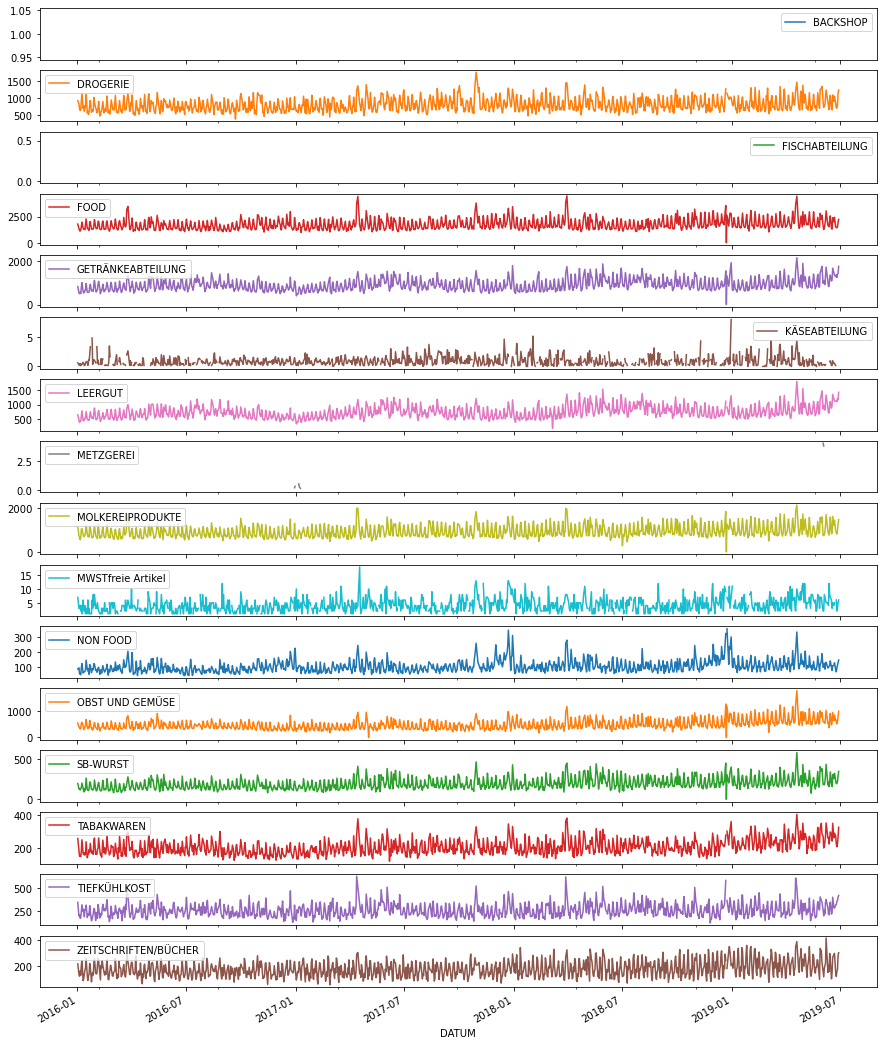

In [108]:
table_abt.clip(0).plot(subplots=True,figsize=(15, 20))

In [109]:
table_wg

BELEGTYP,DATUM,ARTIKEL,MENGE,WGR,ABT
0,2016-01-02,2912,3.0,81,SB-WURST
1,2016-01-02,2913,2.0,81,SB-WURST
2,2016-01-02,2919,1.0,81,SB-WURST
3,2016-01-02,2921,1.0,81,SB-WURST
4,2016-01-02,2960,3.0,81,SB-WURST
...,...,...,...,...,...
2865638,2019-06-29,421018,2.0,80,GETRÄNKEABTEILUNG
2865639,2019-06-29,421047,1.0,6,NON FOOD
2865640,2019-06-29,421270,11.0,33,OBST UND GEMÜSE
2865641,2019-06-29,421301,7.0,33,OBST UND GEMÜSE


In [118]:
aggr = table_wg[table_wg.MENGE > 0]

In [119]:
aggr = aggr[["ARTIKEL", "DATUM"]]

In [121]:
aggr = aggr.groupby(["ARTIKEL"]).agg([min, max])

In [123]:
aggr.columns = ['Einführung', 'Letze_Bewegung']

In [125]:
aggr['Dauer'] = aggr['Letze_Bewegung'] - aggr['Einführung']

In [129]:
aggr.Dauer.describe()

count                       41477
mean     531 days 22:43:39.302263
std      474 days 13:02:31.800955
min               0 days 00:00:00
25%              66 days 00:00:00
50%             398 days 00:00:00
75%            1036 days 00:00:00
max            1274 days 00:00:00
Name: Dauer, dtype: object

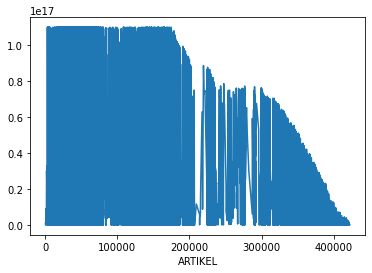

In [131]:
aggr.Dauer.plot()

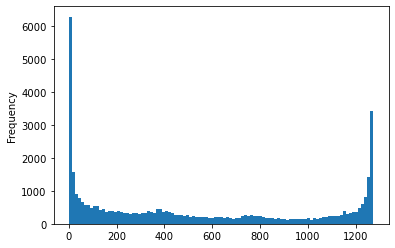

In [136]:
aggr.Dauer.astype('timedelta64[D]').plot.hist(bins=101)